In [51]:
import os
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


%matplotlib inline

In [42]:
sc = SparkSession.builder.appName('data_prep').getOrCreate()

In [43]:
file_path = '../data/raw/Loan_status_2007-2020Q3.gzip'
data_dict_path = '../data/raw/LCDataDictionary.xlsx'

In [44]:
df_data_dictionary = pd.read_excel(data_dict_path)

In [45]:
df_data_dictionary[df_data_dictionary.LoanStatNew=='funded_amnt_inv'].Description

24    The total amount committed by investors for th...
Name: Description, dtype: object

In [46]:
df = sc.read.csv(file_path, header=True, inferSchema=True).drop('_c0')

In [47]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: string (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: double (nullable = true)
 |-- earliest_

In [66]:
df.select('annual_inc').filter((df.annual_inc != 'MORTGAGE') & (df.annual_inc > 0)
                               & ((df.annual_inc < 9_999_999))).summary().show()

+-------+----------------+
|summary|      annual_inc|
+-------+----------------+
|  count|         2922427|
|   mean| 79955.290135514|
| stddev|83756.4955974899|
|    min|               1|
|    25%|         47008.0|
|    50%|         66000.0|
|    75%|         95000.0|
|    max|          999999|
+-------+----------------+



In [54]:
inc = df.select('annual_inc').filter(df.annual_inc != 'MORTGAGE').toPandas().astype('float64')

In [71]:
inc['annual_inc2'] = inc['annual_inc'].map(lambda x: x if x<4e5 else 4e5)

(array([ 2837., 20486., 50695., 61042., 47542., 38293., 23676., 14620.,
         8972.,  6879.,  4940.,  2813.,  2440.,  1187.,   957.,  1492.,
          430.,   475.,   659.,   160.,   252.,   293.,   111.,    97.,
         1201.]),
 array([     0.,  16000.,  32000.,  48000.,  64000.,  80000.,  96000.,
        112000., 128000., 144000., 160000., 176000., 192000., 208000.,
        224000., 240000., 256000., 272000., 288000., 304000., 320000.,
        336000., 352000., 368000., 384000., 400000.]),
 <BarContainer object of 25 artists>)

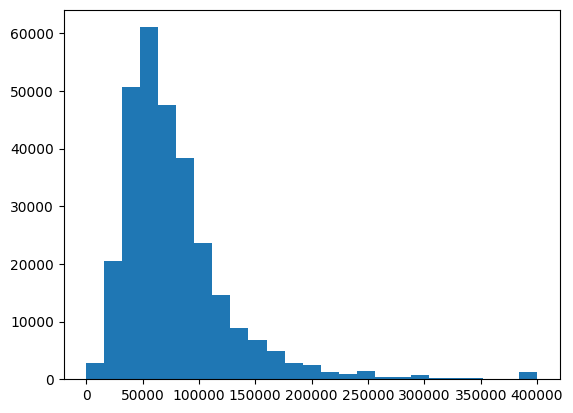

In [72]:
plt.hist(inc.annual_inc2.sample(frac=0.1), bins=25)